# pandas and matplotlib

Both pandas and matplotlib have many, many functions, actions and attributes and an in-depth study of both will be left for intermediate and advanced courses. You could easily spend an entire course (or courses) studying either or both packages.

We will look at another example.  Download the following csv file: 

[pulsenew.csv](https://www.dropbox.com/s/x5ulgxlqxccor4a/PulseNew.csv?dl=1)

and save it to your working folder.  The study is also used in our Intro Statistics courses and shows data collected on college students as they travel to class.  The study displays pulse data before and after the trip to class and includes data on gender, whether or not the student smokes, activity level (1-low, 2-moderate, 3-high), whether the students ran or walked to class, height and weight.

Let's work with the data using pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data from the pulsenew.csv file
pulse = pd.read_csv("pulsenew.csv")

In [2]:
# Let's see what we've got... this is a new command
pulse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
PuBefore     92 non-null int64
PuAfter      92 non-null int64
Ran          92 non-null object
Smokes       92 non-null object
Sex          92 non-null object
Height       92 non-null float64
Weight       92 non-null int64
ActivityL    92 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 5.8+ KB


Looking at the table, you can see the Data columns, each name indicating the column header.  The columns aren't empty (non-null) and there are 4 columns containing integer values, 1 column with floating point values and 3 columns with object or string values (these would be categorical values, most likely).

Let's look at the first five rows of data:

In [3]:
pulse.head()

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL
0,48,54,no,yes,male,68.0,150,1
1,54,56,no,yes,male,69.0,145,2
2,54,50,no,no,male,69.0,160,2
3,58,70,yes,no,male,72.0,145,2
4,58,58,no,no,male,66.0,135,3


In [4]:
# we can also look at the last 5 rows of data
pulse.tail()

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL
87,92,94,no,yes,male,69.0,150,2
88,94,92,no,yes,female,62.0,131,2
89,96,140,yes,no,female,61.0,140,2
90,96,116,yes,no,female,68.0,116,2
91,100,115,yes,yes,female,63.0,121,2


In [5]:
# let's find the minimum heart rate after arriving
# note the syntax, i.e. use of parentheses for min() and
# brackets for the column in the pulse data frame

pulse["PuAfter"].min()

50

In [6]:
# let's find the maximum heart rate after arriving to class

pulse["PuAfter"].max()

140

In [7]:
# and the mean of the PuAfter column

pulse.PuAfter.mean()

80.0

We can also create new columns for our pulse data frame.  How about a new column showing the difference in the before and after pulse rates?

In [8]:
pulse["PulseDiff"] = pulse["PuAfter"] - pulse["PuBefore"]

and let's see the first 5 rows again, showing the new column.

In [9]:
pulse.head()

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL,PulseDiff
0,48,54,no,yes,male,68.0,150,1,6
1,54,56,no,yes,male,69.0,145,2,2
2,54,50,no,no,male,69.0,160,2,-4
3,58,70,yes,no,male,72.0,145,2,12
4,58,58,no,no,male,66.0,135,3,0


What if I want to view only those students who smoke?

In [10]:
pulse[pulse.Smokes == 'yes']

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL,PulseDiff
0,48,54,no,yes,male,68.00,150,1,6
1,54,56,no,yes,male,69.00,145,2,2
8,60,70,no,yes,male,71.50,164,2,10
11,62,76,yes,yes,male,73.50,160,3,14
15,62,98,yes,yes,female,62.75,112,2,36
18,62,68,no,yes,male,73.00,155,2,6
24,66,78,yes,yes,male,73.00,190,1,12
25,66,82,yes,yes,male,69.00,175,2,16
31,68,76,yes,yes,male,74.00,180,2,8
33,68,66,no,yes,male,67.00,150,2,-2


Or only the males who smoke and also ran to class?

In [11]:
# the & is the 'and' sign in pandas statements

pulse[(pulse.Smokes == 'yes') & (pulse.Sex =='male') & (pulse.Ran == 'yes')]

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL,PulseDiff
11,62,76,yes,yes,male,73.5,160,3,14
24,66,78,yes,yes,male,73.0,190,1,12
25,66,82,yes,yes,male,69.0,175,2,16
31,68,76,yes,yes,male,74.0,180,2,8
40,70,72,yes,yes,male,73.0,170,3,2
42,70,94,yes,yes,male,75.0,185,2,24
82,90,94,yes,yes,male,74.0,160,1,4
86,92,84,yes,yes,male,70.0,153,3,-8


Now for an average pulse before (PuBefore) for those males listed above

In [12]:
pulse[(pulse.Smokes == 'yes') & (pulse.Sex =='male') & (pulse.Ran == 'yes')].mean()

PuBefore      73.0000
PuAfter       82.0000
Height        72.6875
Weight       171.6250
ActivityL      2.1250
PulseDiff      9.0000
dtype: float64

Ah... this gave us the mean of ALL the columns in the set of males who smoke and ran.  Can we tease out just the PuBefore?

In [13]:
# create a subset of the pulse data using the above criteria
# the & symbol is pandas 'and' operator

subset = pulse[(pulse.Smokes == 'yes') & (pulse.Sex =='male') & (pulse.Ran == 'yes')]

In [14]:
# make certain the subset looks OK and has males who smoke and ran

subset.head()

,PuBefore,PuAfter,Ran,Smokes,Sex,Height,Weight,ActivityL,PulseDiff
11,62,76,yes,yes,male,73.5,160,3,14
24,66,78,yes,yes,male,73.0,190,1,12
25,66,82,yes,yes,male,69.0,175,2,16
31,68,76,yes,yes,male,74.0,180,2,8
40,70,72,yes,yes,male,73.0,170,3,2


In [15]:
# now let's average the PuBefore column

subset["PuBefore"].mean()

73.0

That's neat... we can do some amazing things with pandas and we've only scratched the surface.  Now let's look at matplotlib.

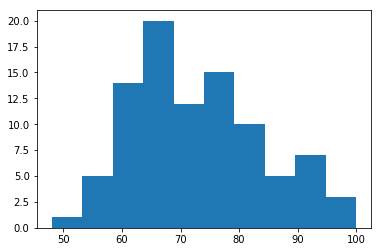

In [16]:
# plot a histogram of the PuBefore data

plt.hist(pulse["PuBefore"])
plt.show()

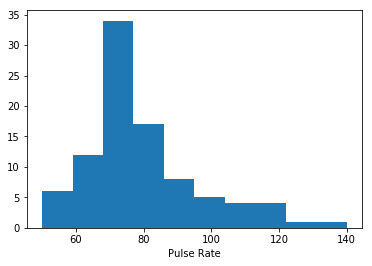

In [17]:
# and PuAfter for comparison, this time adding the x-axis label

plt.hist(pulse["PuAfter"])
plt.xlabel('Pulse Rate')
plt.show()

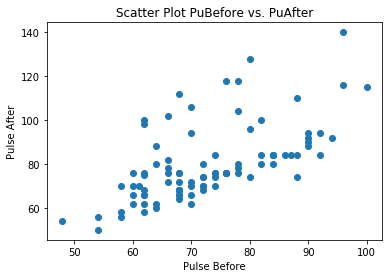

In [18]:
# scatter plot for comparing PuBefore and PuAfter
# there appears to be a strong correlation here

# sometimes it's easier to store a pandas data frame
# column in a variable

x = pulse["PuBefore"]
y = pulse["PuAfter"]

# axis labels and graph title
plt.xlabel('Pulse Before')
plt.ylabel('Pulse After')
plt.title('Scatter Plot PuBefore vs. PuAfter')

# render the scatter plot
plt.scatter(x,y)
plt.show()

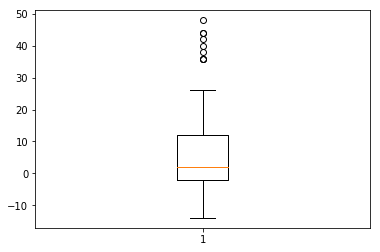

In [19]:
# and a box plot of the newly created PulseDiff column
plt.boxplot(pulse['PulseDiff'])
plt.show()

# matplotlib

matplotlib is an excellent data visualization program and I want to present some simple examples from the matplotlib tutorials.  matplotlib can plot 3D functions, animations, images and darn near anything you can conjure.

I highly recommend that you take the time to look at the matplotlib [examples](http://matplotlib.org/examples/index.html), [gallery](http://matplotlib.org/gallery.html), [tutorials](https://matplotlib.org/tutorials/index.html) and [FAQ],(http://matplotlib.org/faq/index.html).

Here are some example plots... this is just for fun (although I've added a few # statement here and there).

In [ ]:
"""
===========================
Frontpage histogram example
===========================

This example reproduces the frontpage histogram example.
"""

import matplotlib.pyplot as plt
import numpy as np

# pick 10000 random values from
# a Normal distribution
X = np.random.randn(10000)

# all plotting is done by referencing axes
# the subplot function adds a layer of functions
# to the axes. 
fig, ax = plt.subplots()
ax.hist(X, bins=25, normed=True)

# linspace is a more accurate 'range' function
# and is available through numpy
x = np.linspace(-5, 5, 1000)

ax.plot(x, 1 / np.sqrt(2*np.pi) * np.exp(-(x**2)/2), linewidth=4)
ax.set_xticks([])
ax.set_yticks([])

# this line saves an image in a png file in your working directory
fig.savefig("histogram_frontpage.png", dpi=25)  # results in 160x120 px image

# if you see a warning message when running this cell, you can safely ignore it

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
# the 0. and 5. indicate floating point values
# Python's range() function can only return
# integers.  numpy's arange() is also MUCH
# faster due to numpy's optimized code

# store the entire range in the variable t
t = np.arange(0.0, 5.0, 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

The second example is a bit more complex and illustrates a histogram from a Normal distribution of test scores with mean = 100 and standard deviation = 15.  We'll use a python script to create and display the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# the mean and standard deviation of test scores
# note that we can define more than one variable at a time

mu, sigma = 100, 15

# the x axis value of the test score = the mean (mu)
# plus the standard deviation (sigma) * (a number from the standard Normal distribution)
# this number from the standard Normal distribution an be positive or negative and
# we'll choose 10000 values... so there are 10000 scores to be binned in the histogram

x = mu + sigma * np.random.randn(10000)

# the histogram of the data
# we use 50 bins, normed = 1 displays Normal plot density, the graph is 'g' (green)
# and alpha (or transparency) is 75% soe we can see through the graph to some extent

n, bins, patches = plt.hist(x, 50,  normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Test Scores')
plt.ylabel('Probability')
plt.title('Histogram of Test Scores')

# the $\mu = 100,\ and \sigma = 15$ is optional
# and uses LaTeX typesetting to create the mu and sigma characters

plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [ ]:
A simple line plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
#fig, ax = plt.subplots()


plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Simple Plot')

plt.grid()

# you can save the plot to your working folder by uncommenting the next line
# fig.savefig("test.png")
plt.plot(t, s)
plt.show()


A pie chart... a bit more complex

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# subplots again... note how you can include the labels in
# the pie function
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

A scatter plot example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

some box plots...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(data)

# notched plot
plt.figure()
plt.boxplot(data, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(data, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(data, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(data, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(data, 0, 'rs', 0, 0.75)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

I'm a fan of eye-candy plots and here is an example...

In [ ]:
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

As an old physics teacher, this one is a favorite

In [ ]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

And finally, the anatomy of a matplotlib pyplot figure...

In [ ]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()


## Go to the Conda lesson